| Señal (en la imagen) | Algoritmos que la extraen (CV clásico) | Casos de uso frecuentes |
|---------------------|----------------------------------------|-------------------------|
| Brillo / Intensidad | Histograma (gris), Umbral global, Umbral adaptativo (mean/gaussian), Otsu, Sauvola, Niblack | Binarización, OCR, preprocesado |
| Gradiente | Sobel, Scharr, Prewitt, Roberts, Frei–Chen, Derivadas Gaussianas | Bordes, orientación local |
| Bordes | Canny, Laplaciano, LoG, DoG, Marr–Hildreth, Kirsch, Edge Drawing | Segmentación, contornos |
| Líneas | Hough, Hough probabilístico, LSD, EDLines, RANSAC + línea | Carriles, estructuras |
| Círculos / Elipses | Hough círculos/elipses, RANSAC, ajuste LSQ | Ruedas, iris, piezas |
| Esquinas | Harris, Shi–Tomasi, FAST, AGAST, SUSAN, Moravec | SLAM, matching |
| Blobs | LoG blob, DoG blob, Hessian (DoH), MSER, SimpleBlobDetector | Puntos prominentes |
| Keypoints | SIFT, SURF, KAZE, AKAZE, ORB, BRISK | Registro, AR |
| Descriptores locales | SIFT, SURF, ORB, BRIEF, BRISK, FREAK, LATCH, DAISY, GLOH | Matching |
| Parches / Correlación | SSD, SAD, NCC, ZNCC, Census, Phase Correlation, Template Matching | Tracking simple |
| Textura (micro) | LBP, GLCM/Haralick, Gabor, Laws, Textons, LPQ, BSIF | Materiales, defectos |
| Textura (media) | HOG, Dense SIFT, GIST, BoVW | Detección, clasificación |
| Color | Histogramas RGB/HSV/Lab, Moments, Correlogram | Segmentación por color |
| Color + estructura | OppSIFT, rgSIFT, HSV-SIFT, CSURF | Logos, productos |
| Regiones | Flood Fill, Connected Components, Region Growing | Conteo, segmentación |
| Regiones estables | MSER, Extremal Regions | Texto en escena |
| Superpixels | SLIC, SLICO, SEEDS, Felzenszwalb, Quickshift | Presegmentación |
| Clustering | K-means, GMM/EM, Mean-Shift, Spectral | Segmentación |
| Grafos / Energía | Graph Cuts, GrabCut, Normalized Cuts, Random Walker | Foreground/background |
| Watershed / Morfología | Watershed, Distancia + watershed, Erosión, Dilatación, Opening, Closing | Separar objetos |
| Contornos | Marching Squares, FindContours, Chain Code, Douglas–Peucker | Medición |
| Forma (global) | Momentos, Hu, Zernike, Fourier Descriptors, Shape Context | Clasificación |
| Esqueleto | Zhang–Suen, Guo–Hall, Medial Axis, Thinning | Análisis de trazos |
| Geometría | Convex Hull, Convexity Defects, PCA shape | Orientación |
| Perspectiva | Hough + clustering, RANSAC VP | Navegación |
| Frecuencia | FFT, DCT, Wavelets, Cepstrum | Análisis periódico |
| Saliencia | Itti–Koch, Spectral Residual, GBVS | ROI, atención |
| Movimiento | Frame differencing, MHI, Block motion | Actividad |
| Optical Flow | Lucas–Kanade, Pyramidal LK, Horn–Schunck, Farnebäck, TV-L1 | Tracking |
| Sustracción fondo | MOG, MOG2, KNN, ViBe, SuBSENSE | Vigilancia |
| Profundidad | StereoBM, StereoSGBM, SAD/SSD, Census, SGM, ELAS | Robótica |
| Multi-vista 3D | Fundamental/Essential, RANSAC, Triangulación, BA, PnP | SLAM |
| Homografía | RANSAC + DLT, ECC alignment | Panoramas |
| Calibración | Checkerboard, Círculos grid, Zhang | Metrología |
| Fiduciales | ArUco, AprilTag, QR detection | Pose estimation |


# Senal -> Brillo intensidad
| Algoritmo | Descripción de alto nivel |
|----------|---------------------------|
| Histograma (escala de grises) | Cuenta cuántos píxeles hay para cada nivel de brillo; permite entender la distribución de intensidades |
| Umbral global | Aplica un único valor de corte para separar píxeles claros y oscuros |
| Umbral adaptativo (mean) | Calcula el umbral usando el promedio local alrededor de cada píxel |
| Umbral adaptativo (gaussian) | Similar al adaptativo mean, pero pondera más los píxeles cercanos |
| Otsu | Encuentra automáticamente el mejor umbral separando dos clases de brillo |
| Sauvola | Umbral adaptativo basado en media y desviación estándar local |
| Niblack | Umbral adaptativo que usa media y varianza local |


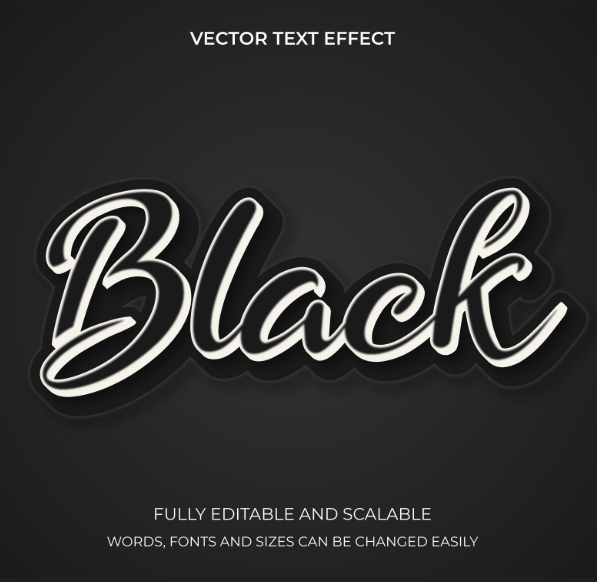

In [7]:
from IPython.display import Image, display
from PIL import Image as PILImage
import numpy as np

img1 = np.array(PILImage.open("imagenes/intensidad/image_1.png"))
img2 = np.array(PILImage.open("imagenes/intensidad/image_2.png"))
img3 = np.array(PILImage.open("imagenes/intensidad/image_3.png"))
display(Image(filename="imagenes/intensidad/image_1.png"))

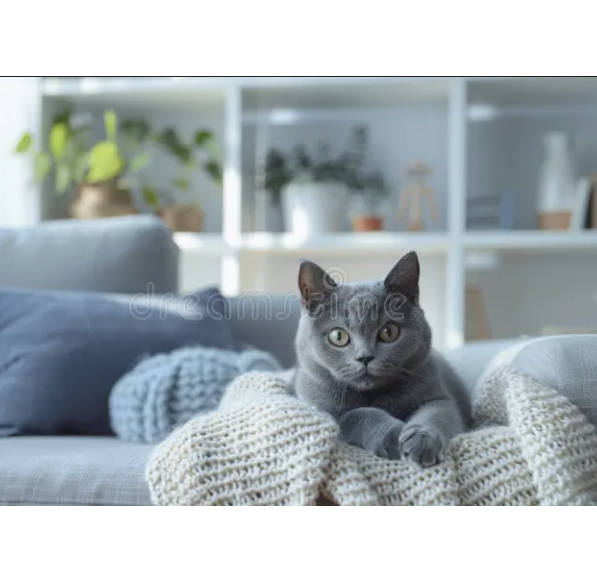

In [5]:
from IPython.display import Image, display

display(Image(filename="imagenes/intensidad/image_2.png"))

| Métrica | Objetivo de la métrica | Cómo se calcula (Python + TensorFlow) | Rangos e interpretación |
|-------|------------------------|--------------------------------------|-------------------------|
| Rango dinámico efectivo | Medir cuánto del rango de intensidades [0–255] usa la imagen | ```python\nmin_i = tf.reduce_min(gray)\nmax_i = tf.reduce_max(gray)\ndynamic_range = max_i - min_i\n``` | **Muy mala:** < 50<br>**Mala:** 50–80<br>**Buena:** 80–120<br>**Muy buena:** > 120 |
| Desviación estándar | Medir contraste global (dispersión del brillo) | ```python\nstd = tf.math.reduce_std(tf.cast(gray, tf.float32))\n``` | **No sirve:** < 15<br>**Mala:** 15–25<br>**Buena:** 25–50<br>**Muy buena:** > 50 |
| Entropía del histograma | Medir cuánta información aporta la intensidad | ```python\nhist = tf.cast(hist, tf.float32)\np = hist / tf.reduce_sum(hist)\nentropy = -tf.reduce_sum(tf.where(p > 0, p * tf.math.log(p) / tf.math.log(2.0), 0.0))\n``` | **No sirve:** < 3<br>**Mala:** 3–4<br>**Buena:** 4–5<br>**Muy buena:** > 5 |
| Bimodalidad (número de picos) | Detectar separación claro / oscuro | ```python\nh = hist.numpy()\npeaks = ((h[1:-1] > h[:-2]) & (h[1:-1] > h[2:])).sum()\n``` | **No sirve:** 1 pico<br>**Mala:** 2 picos poco definidos<br>**Buena:** ≥ 2 picos claros |
| Saturación baja (0) | Detectar pérdida de información por negro absoluto | ```python\nsat_low = hist[0] / tf.reduce_sum(hist)\n``` | **Muy mala:** > 10%<br>**Mala:** 5–10%<br>**Buena:** < 5% |
| Saturación alta (255) | Detectar pérdida de información por blanco absoluto | ```python\nsat_high = hist[255] / tf.reduce_sum(hist)\n``` | **Muy mala:** > 10%<br>**Mala:** 5–10%<br>**Buena:** < 5% |
| Separabilidad (Otsu) | Medir qué tan bien se pueden separar dos clases de intensidad | ```python\nimport tensorflow as tf\nt = tf.cast(tf.experimental.numpy.mean(gray), tf.uint8)\nmask = gray > t\nsep = tf.math.reduce_variance(tf.boolean_mask(gray, mask)) + tf.math.reduce_variance(tf.boolean_mask(gray, ~mask))\n``` | **No sirve:** varianza alta<br>**Buena:** varianza baja relativa |
| Score global de intensidad | Tener una medida única de calidad de señal | ```python\nscore = (0.4 * dynamic_range / 255 + 0.3 * std / 64 + 0.3 * entropy / 8)\n``` | **No sirve:** < 0.4<br>**Mala:** 0.4–0.55<br>**Buena:** 0.55–0.7<br>**Muy buena:** > 0.7 |


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def grayscale_histogram_tf_cv2(image_path: str, bins: int = 256):
    """
    Algoritmo: Histograma (escala de grises)
    1) Carga imagen con OpenCV (BGR uint8)
    2) Convierte a escala de grises (uint8 0..255)
    3) Calcula histograma con TensorFlow (conteo por intensidad)
    4) Devuelve: gray (H,W) uint8, hist (bins,) int32
    """

    # 1) Cargar con OpenCV
    bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if bgr is None:
        raise FileNotFoundError(f"No pude leer la imagen: {image_path}")

    # 2) A gris (uint8 0..255)
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

    # 3) Histograma con TensorFlow (bincount)
    gray_tf = tf.convert_to_tensor(gray, dtype=tf.uint8)     # [H,W]
    values = tf.reshape(gray_tf, [-1])                       # [N]
    hist = tf.math.bincount(values, minlength=bins, maxlength=bins, dtype=tf.int32)

    return gray, hist

def show_gray_and_hist(gray: np.ndarray, hist_tf: tf.Tensor, title_prefix=""):
    """Visualización opcional: imagen gris + histograma."""
    hist = hist_tf.numpy()

    plt.figure()
    plt.title(f"{title_prefix}Grayscale image")
    plt.imshow(gray, cmap="gray")
    plt.axis("off")

    plt.figure()
    plt.title(f"{title_prefix}Histogram (0..255)")
    plt.plot(hist)
    plt.xlabel("Intensidad")
    plt.ylabel("Cantidad de píxeles")
    plt.show()

# --- EJEMPLO DE USO ---
image_path = "imagenes/intensidad/image_1.png"

gray, hist_tf = grayscale_histogram_tf_cv2(image_path)

print("Gray shape:", gray.shape, "dtype:", gray.dtype)
print("Hist shape:", hist_tf.shape, "dtype:", hist_tf.dtype)
print("Total pixels:", int(tf.reduce_sum(hist_tf).numpy()))

show_gray_and_hist(gray, hist_tf, title_prefix="image_1 - ")
